<a href="https://colab.research.google.com/github/Lukematic/Washington-House-sales/blob/main/TeamProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 

import pandas as pd 
#pandas displays 20 columns by default, this changes that to 100 columns, useful for Pivot table
pd.set_option('display.max_columns',100) 

import matplotlib as mpl 

import matplotlib.pyplot as plt 

import seaborn as sns

import datetime

from mpl_toolkits.mplot3d import Axes3D

test

In [ ]:
from google.colab import files
uploaded = files.upload() #upload the data
hs = pd.read_csv('house_sales.csv') # Load the data
hs.head()

Saving house_sales.csv to house_sales.csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#hs = pd.read_csv( '/Users/oscargil/Desktop/TeamProject/house_sales.csv', sep=',')
#del hs

FileNotFoundError: ignored

In [ ]:
# The dataset has 21,613 observations (rows) and 21 features (columns).
hs.shape

(21613, 21)

In [ ]:
# datatype of columns

   # most variables are int64 or float64.  There is only one variable ('date') that is object, or categorical.
    
hs.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# categorical variable analysis

   # We only have one categorical variable (date) in the dataset, as determined by the datatype 'object'.
      # count  = there are 21,613 values (each row has a value)
      # unique = there are 372 unique date values in the dataset
      # top    = the most frequent date value is 20140623T000000
      # freq   = there are 142 rows containing the top value of 20140623T000000 in the dataset

hs.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [ ]:
# further analysis on categorical variable ('date')

    # min  = 2014-05-02
    # max  = 2015-05-27
    # mean = 2014-10-29
    
    # Sales in the dataset cover a range from May 2, 2014 through May 27, 2015.
    
pd.to_datetime(hs['date']).describe(datetime_is_numeric=True)

count                            21613
mean     2014-10-29 04:38:01.959931648
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
Name: date, dtype: object

In [ ]:
# convert date(object) to datetime, as this is more appropriate for this variable's data

hs['date'] = pd.to_datetime(hs['date'])

In [ ]:
# datetype of columns

    # 'date' now appears as datetime and no longer as object(categorical)

hs.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

<AxesSubplot:xlabel='price', ylabel='date'>

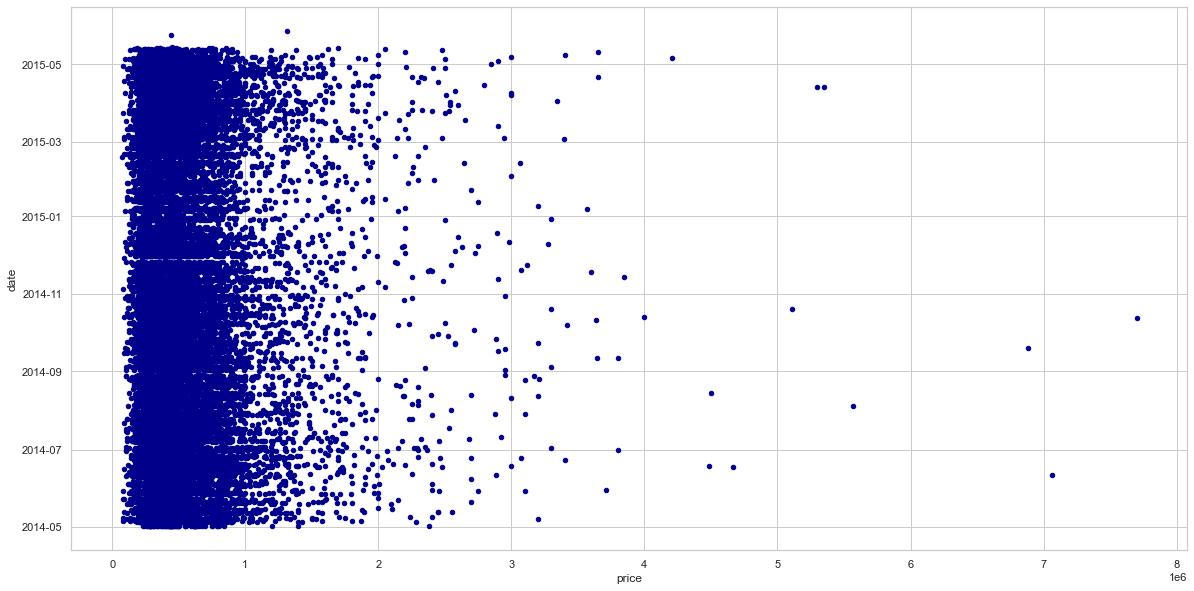

In [ ]:
# use date field in scatter as it is now datetime and eligible for this type of graph

hs.plot.scatter(x = 'price', y='date', c='DarkBlue', figsize=(20,10))

In [ ]:
# view a sample of the data
   # Can you understand the column names? Do they make sense? (Check with the variable definitions again if needed)
   # Do the values in these columns make sense?
   # Are there significant missing values (NaN) sighted?
   # What types of classes do the categorical features have?

hs.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19027,5459500165,2014-07-08,623000.0,3.0,1.75,2050.0,16313.0,1.0,0,0,2,8,2050,0,1973,0,98040,47.5743,-122.212,3180,10264
1532,8165500830,2015-03-27,409900.0,3.0,2.50,1690.0,1200.0,2.0,0,0,3,8,1410,280,2013,0,98106,47.5389,-122.367,1690,1760
15922,2425069069,2014-05-27,587000.0,3.0,2.25,2370.0,217800.0,2.0,0,0,3,7,2370,0,1979,0,98053,47.6364,-121.984,3100,86248
13675,4389201075,2014-07-31,1900000.0,4.0,2.50,3680.0,13351.0,2.0,0,2,5,9,3680,0,1946,1982,98004,47.6154,-122.214,3410,11700
4898,4154300275,2015-01-15,245000.0,NaN,1.00,990.0,4800.0,1.0,0,0,3,6,990,0,1908,0,98118,47.5615,-122.280,1700,5400


C:\Users\OscarGil\miniconda3\envs\ADS500B\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


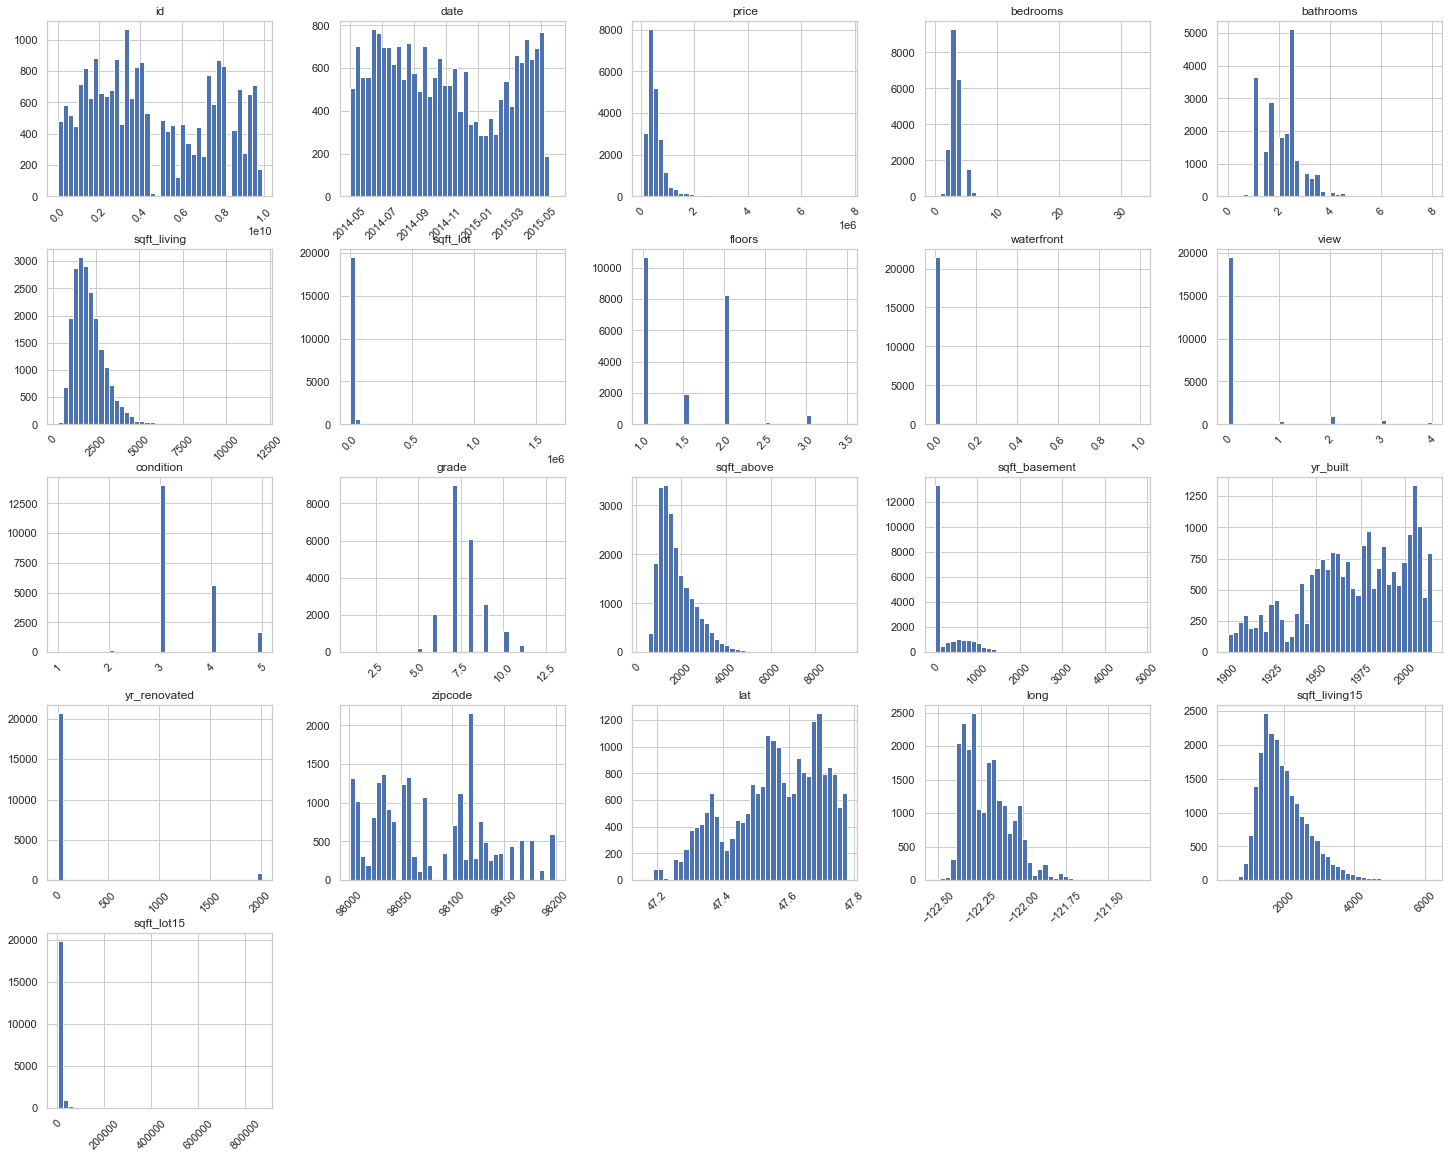

In [ ]:
# plot each numeric feature

   # What to look out for:
      # date was not reflected until changing its format to datetime
    
   # Possible outliers that cannot be explained or might be measurement errors
   # Numeric features that should be categorical. For example, Gender represented by 1 and 0.
   # Boundaries that do not make sense such as percentage values> 100.

hs.hist(figsize=(25,20), xrot=45, bins=40)
plt.show()

In [ ]:
# summary statistics

# to identify columns containing less than total number of rows in dataset (21,613)

t = hs.count()
t[t < 21613]

bedrooms       20479
bathrooms      20545
sqft_living    20503
sqft_lot       20569
dtype: int64

In [ ]:
# summary statistics..continued

       # bedrooms    (20,479) -- min = 0, max = 33 (questionable data)
       # bathrooms   (20,545) -- min = 0, max = 8  (questionable data)
       # sqft_living (20,503) 
       # sqft_lot    (20,569)
    
hs[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot
count,20479.000000,20547.000000,20503.000000,2.056900e+04
mean,3.370331,2.114506,2081.073697,1.517982e+04
std,0.903850,0.767735,915.043176,4.148617e+04
min,0.000000,0.500000,290.000000,5.200000e+02
25%,3.000000,1.750000,1430.000000,5.040000e+03
50%,3.000000,2.250000,1920.000000,7.620000e+03
75%,4.000000,2.500000,2550.000000,1.070800e+04
max,9.000000,8.000000,12050.000000,1.651359e+06


In [ ]:
# pivot table of the data for bedrooms and bathrooms (BEFORE data updates)

# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
# fill_value='' removes Nan values
pd.pivot_table(hs, index = 'bedrooms', columns = ['bathrooms'], fill_value='', aggfunc='count')

condition                                                          \
bathrooms      0.50  0.75    1.00 1.25   1.50    1.75   2.00   2.25    2.50   
bedrooms                                                                      
0.0                                                     11.0                  
1.0             1.0  24.0   122.0  2.0   10.0     4.0    6.0    3.0     2.0   
2.0             2.0  25.0  1416.0  2.0  263.0   274.0  192.0  105.0   182.0   
3.0                  15.0  1604.0  3.0  748.0  1685.0  943.0  978.0  2120.0   
4.0             1.0         295.0       229.0   658.0  450.0  647.0  2252.0   
5.0                          40.0        46.0   118.0  105.0  107.0   264.0   
6.0                           6.0         6.0    13.0   23.0   11.0    28.0   
7.0                           1.0         2.0                   3.0     2.0   
8.0                                                                           
9.0                                                                           

                                                                               \
bathrooms   2.75   3.00   3.25   3.50  3.75  4.00  4.25  4.50  4.75 5.00 5.25   
bedrooms                                                                        
0.0                                                                             
1.0                 2.0                                                         
2.0         19.0   12.0    7.0                                                  
3.0        247.0  176.0  157.0  121.0  17.0  10.0   5.0   4.0             1.0   
4.0        574.0  303.0  225.0  343.0  67.0  51.0  35.0  27.0   7.0  7.0  4.0   
5.0        192.0  146.0  120.0  154.0  43.0  44.0  24.0  35.0  11.0  6.0  4.0   
6.0         29.0   42.0   12.0   17.0  13.0  11.0   8.0  21.0   3.0  5.0  1.0   
7.0          3.0    2.0    1.0    4.0   2.0   4.0   2.0   2.0   2.0             
8.0          3.0    1.0    1.0    1.0   1.0   2.0                    1.0        
9.0                 1.0                       1.0         1.0                   

                                                       date                \
bathrooms 5.50 5.75 6.00 6.25 6.50 6.75 7.50 7.75 8.00 0.50  0.75    1.00   
bedrooms                                                                    
0.0                                                                         
1.0                                                     1.0  24.0   122.0   
2.0                                                     2.0  25.0  1416.0   
3.0                                                          15.0  1604.0   
4.0        5.0                                          1.0         295.0   
5.0        4.0  2.0  3.0  2.0  1.0  1.0                              40.0   
6.0                  1.0       1.0            1.0  1.0                6.0   
7.0        1.0  1.0                                                   1.0   
8.0                  1.0                                                    
9.0                                      1.0                                

                                                                          \
bathrooms 1.25   1.50    1.75   2.00   2.25    2.50   2.75   3.00   3.25   
bedrooms                                                                   
0.0                             11.0                                       
1.0        2.0   10.0     4.0    6.0    3.0     2.0           2.0          
2.0        2.0  263.0   274.0  192.0  105.0   182.0   19.0   12.0    7.0   
3.0        3.0  748.0  1685.0  943.0  978.0  2120.0  247.0  176.0  157.0   
4.0             229.0   658.0  450.0  647.0  2252.0  574.0  303.0  225.0   
5.0              46.0   118.0  105.0  107.0   264.0  192.0  146.0  120.0   
6.0               6.0    13.0   23.0   11.0    28.0   29.0   42.0   12.0   
7.0               2.0                   3.0     2.0    3.0    2.0    1.0   
8.0                                                    3.0    1.0    1.0   
9.0           

In [ ]:
hs.dropna(subset=['bedrooms', 'bathrooms'], how='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#hs[hs['bedrooms'].isnull() & hs['bathrooms'].isnull()]
#display(hs.iloc[15870])
#hs.dropna(subset=['bedrooms', 'bathrooms'], how='all').shape

#update Bedrooms and Bathrooms where data is not credible
#hs[hs['bedrooms'].isnull(), 'bedrooms'] = 0

#hs[hs['bathrooms'].isnull(), 'bathrooms'] = 0

hs.loc[(hs['bedrooms'] == 0), 'bathrooms'] = 2

hs.loc[(hs['bathrooms'] == 0), 'bathrooms'] = 3

hs.loc[(hs['bedrooms'] == 33), 'bedrooms'] = 3

hs.loc[(hs['bedrooms'] == 10), 'bedrooms'] = 3

hs.dropna(subset=['bedrooms', 'bathrooms'], how='all')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# there are 59 rows (.0027 % of the dataset) containing missing Bedroom and Bathroom data
hs[hs['bedrooms'].isnull() & hs['bathrooms'].isnull()]# & hs['sqft_living'].isnull() & hs['sqft_lot'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
361,1072010350,2014-08-28,380000.0,NaN,NaN,2760.0,11340.0,2.0,0,0,4,9,2760,0,1978,0,98059,47.4769,-122.141,2470,11340
987,316000160,2014-08-21,260000.0,NaN,NaN,1480.0,7469.0,1.5,0,0,3,6,1120,360,1940,0,98168,47.5048,-122.301,1460,7379
1029,1370804430,2015-03-05,543115.0,NaN,NaN,1380.0,5484.0,1.0,0,0,3,8,1030,350,1947,0,98199,47.6382,-122.399,1380,5347
1571,934300140,2015-03-23,284950.0,NaN,NaN,2000.0,NaN,1.0,0,0,4,7,1170,830,1962,0,98198,47.3708,-122.311,1940,7531
1887,5409800140,2015-02-17,410500.0,NaN,NaN,3362.0,8601.0,2.0,0,0,3,8,3362,0,2004,0,98003,47.2592,-122.304,2770,8601
2176,6344000060,2014-10-15,760000.0,NaN,NaN,2770.0,8521.0,1.0,0,0,4,7,1470,1300,1953,0,98004,47.6255,-122.199,1910,9380
2221,7137900960,2014-06-25,235000.0,NaN,NaN,1570.0,9415.0,2.0,0,0,4,7,1570,0,1984,0,98092,47.3168,-122.174,1550,8978
2563,8722100570,2015-04-03,1600000.0,NaN,NaN,2940.0,5735.0,1.0,0,0,3,9,1470,1470,1957,0,98112,47.6381,-122.304,2230,5659
2597,2972300140,2014-08-21,352500.0,NaN,NaN,1920.0,33630.0,1.0,0,0,3,8,1920,0,1992,0,98056,47.4983,-122.167,2080,7505
2635,6791400320,2014-09-23,257500.0,NaN,NaN,1530.0,14087.0,1.0,0,0,3,7,1070,460,1979,0,98042,47.3146,-122.043,1770,13660


In [ ]:
# pivot table of the data for bedrooms and bathrooms (AFTER data updates)

# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
# fill_value='' removes Nan values
pd.pivot_table(hs, index = 'bedrooms', columns = ['bathrooms'], fill_value='', aggfunc='count')

condition                                                          \
bathrooms      0.50  0.75    1.00 1.25   1.50    1.75   2.00   2.25    2.50   
bedrooms                                                                      
0.0                                                     11.0                  
1.0             1.0  24.0   122.0  2.0   10.0     4.0    6.0    3.0     2.0   
2.0             2.0  25.0  1416.0  2.0  263.0   274.0  192.0  105.0   182.0   
3.0                  15.0  1604.0  3.0  748.0  1685.0  943.0  978.0  2120.0   
4.0             1.0         295.0       229.0   658.0  450.0  647.0  2252.0   
5.0                          40.0        46.0   118.0  105.0  107.0   264.0   
6.0                           6.0         6.0    13.0   23.0   11.0    28.0   
7.0                           1.0         2.0                   3.0     2.0   
8.0                                                                           
9.0                                                                           

                                                                               \
bathrooms   2.75   3.00   3.25   3.50  3.75  4.00  4.25  4.50  4.75 5.00 5.25   
bedrooms                                                                        
0.0                                                                             
1.0                 2.0                                                         
2.0         19.0   12.0    7.0                                                  
3.0        247.0  176.0  157.0  121.0  17.0  10.0   5.0   4.0             1.0   
4.0        574.0  303.0  225.0  343.0  67.0  51.0  35.0  27.0   7.0  7.0  4.0   
5.0        192.0  146.0  120.0  154.0  43.0  44.0  24.0  35.0  11.0  6.0  4.0   
6.0         29.0   42.0   12.0   17.0  13.0  11.0   8.0  21.0   3.0  5.0  1.0   
7.0          3.0    2.0    1.0    4.0   2.0   4.0   2.0   2.0   2.0             
8.0          3.0    1.0    1.0    1.0   1.0   2.0                    1.0        
9.0                 1.0                       1.0         1.0                   

                                                       date                \
bathrooms 5.50 5.75 6.00 6.25 6.50 6.75 7.50 7.75 8.00 0.50  0.75    1.00   
bedrooms                                                                    
0.0                                                                         
1.0                                                     1.0  24.0   122.0   
2.0                                                     2.0  25.0  1416.0   
3.0                                                          15.0  1604.0   
4.0        5.0                                          1.0         295.0   
5.0        4.0  2.0  3.0  2.0  1.0  1.0                              40.0   
6.0                  1.0       1.0            1.0  1.0                6.0   
7.0        1.0  1.0                                                   1.0   
8.0                  1.0                                                    
9.0                                      1.0                                

                                                                          \
bathrooms 1.25   1.50    1.75   2.00   2.25    2.50   2.75   3.00   3.25   
bedrooms                                                                   
0.0                             11.0                                       
1.0        2.0   10.0     4.0    6.0    3.0     2.0           2.0          
2.0        2.0  263.0   274.0  192.0  105.0   182.0   19.0   12.0    7.0   
3.0        3.0  748.0  1685.0  943.0  978.0  2120.0  247.0  176.0  157.0   
4.0             229.0   658.0  450.0  647.0  2252.0  574.0  303.0  225.0   
5.0              46.0   118.0  105.0  107.0   264.0  192.0  146.0  120.0   
6.0               6.0    13.0   23.0   11.0    28.0   29.0   42.0   12.0   
7.0               2.0                   3.0     2.0    3.0    2.0    1.0   
8.0                                                    3.0    1.0    1.0   
9.0           

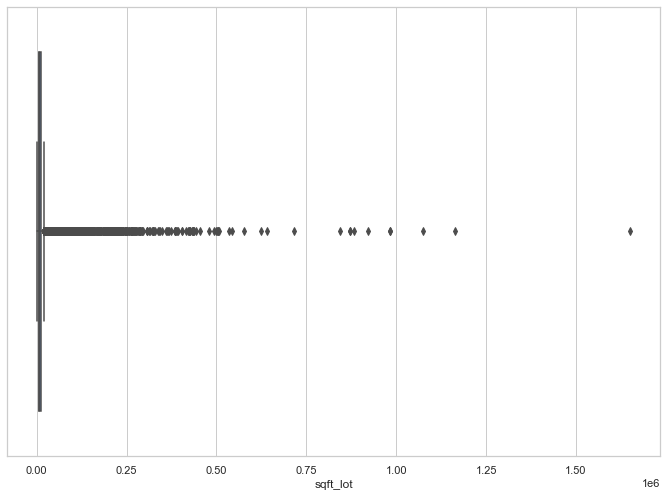

In [ ]:
# box plot to view sqft_lot

   # many outliers in the high range

sns.set_theme(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x=hs["sqft_lot"])

In [ ]:
# add new column 'dateMonth' to dataset to capture month associated to 'date' for analysis by month

hs['dateMonth'] = hs['date'].dt.month

In [ ]:
# analysis of dateMonth
 
    # mean = 6.57, June and mid-June, is where the mean of house sales take place.

hs['dateMonth'].describe()

count    21613.000000
mean         6.574423
std          3.115308
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: dateMonth, dtype: float64

In [ ]:
# counts of dateMonth by id

   # the counts by dateMonth show May as being the month with most sales in the dataset
   # which can be partially due to being the only month in the dataset represented by 
   # both years 2014 and 2015.

hs.groupby('dateMonth')['id'].count()

dateMonth
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64

<AxesSubplot:xlabel='dateMonth'>

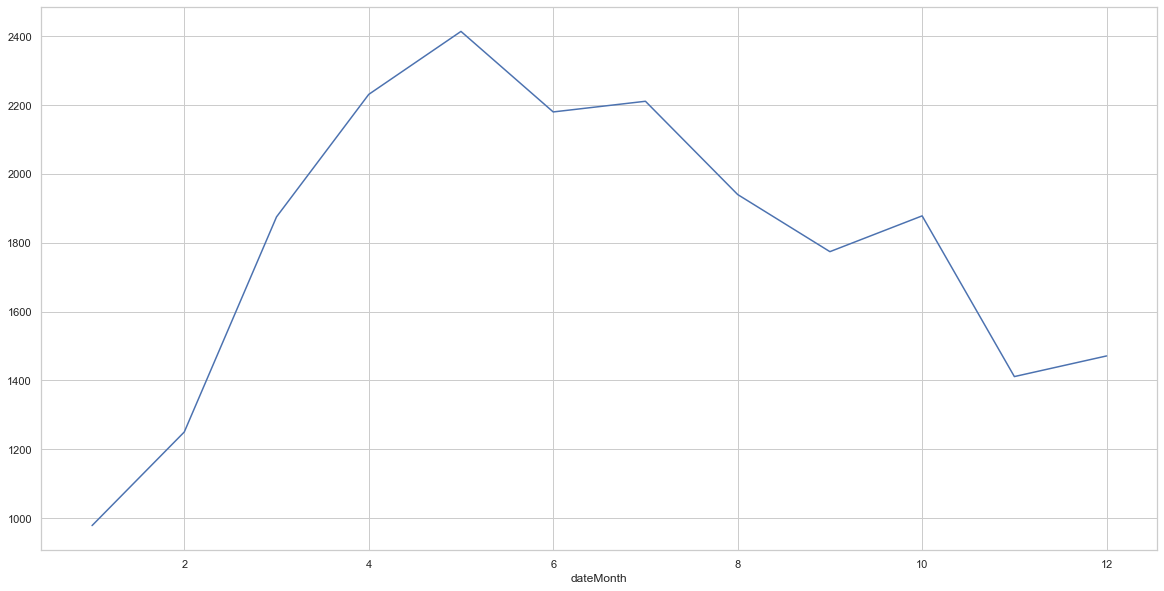

In [ ]:
# line graph of house sales by dateMonth

    # House sales peak in the summer, May through July.  Sales pick up again in October and slow down in November
    # before picking up one last time in December.

fig, ax = plt.subplots(figsize=(20,10))
hs.groupby('dateMonth')['id'].count().plot(ax=ax)

In [ ]:
# These box plots reflect price by dateMonth.  It shows trends in terms of outliers in house sale price every month.
# This information can be helpful to realtors, identifying trends of which months buyers are willing to spend more.
# Could outlier behavior be propelled by losing out on properties in prior months, resulting in motivation to spend more?

plt.figure(figsize=(15,10))
sns.boxplot(x='dateMonth',y='price',data=hs)

ValueError: Could not interpret input 'dateMonth'

<Figure size 1080x720 with 0 Axes>

In [ ]:
# analysis of price (dependent variable?)
 
    # count          = all rows in the dataset have a price (row count 21,613)
    # mean           = $  540,000
    # min            = $   75,000
    # 25%(Q1)        = $  321,950
    # 50%(Q2/Median) = $  450,000
    # 75%(Q3)        = $  645,000
    # IQR            = $  323,050
    # max            = $7,700,000

hs['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

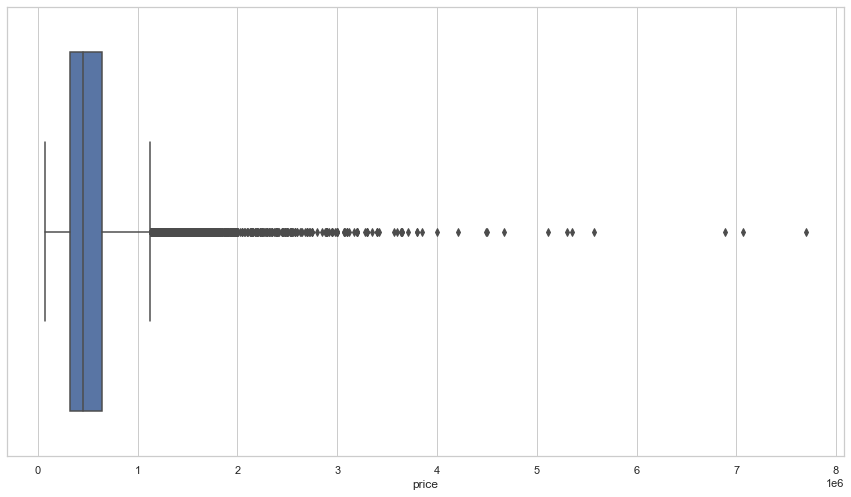

In [ ]:
# box plot of price

   # many outliers in the high range

sns.set_theme(style="whitegrid", rc={'figure.figsize':(15,8.27)})
ax = sns.boxplot(x=hs["price"])

<AxesSubplot:xlabel='price'>

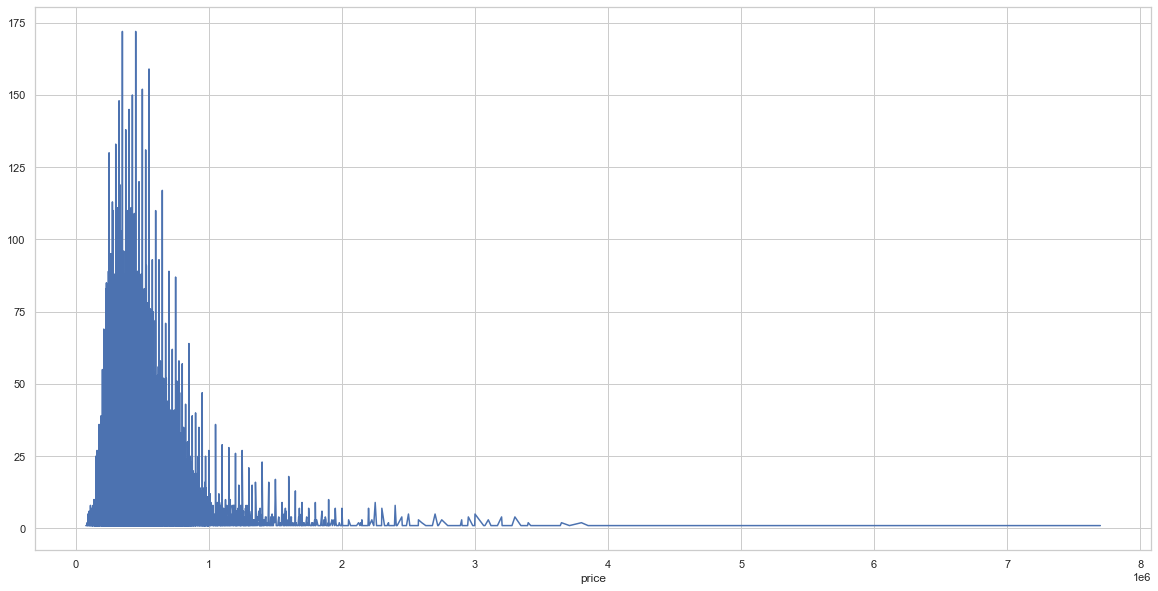

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
hs.groupby('price')['id'].count().plot(ax=ax)

Text(0.5, 0, 'Price')

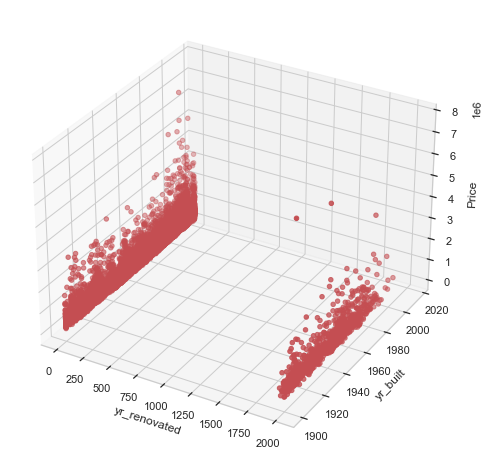

In [ ]:
# 3D comparisons

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = hs['yr_renovated']
x2 = hs['yr_built']
y  = hs['price']


ax.scatter(x1, x2, y, c='r', marker='o')

# Set axis labels
ax.set_xlabel('yr_renovated')
ax.set_ylabel('yr_built')
ax.set_zlabel('Price')

In [ ]:
# analysis of longitude and latitute to map data to get map at openstreetmap.org, using min and max values from variables

hs[['long','lat']].head()

,long,lat
0,-122.257,47.5112
1,-122.319,47.7210
2,-122.233,47.7379
3,-122.393,47.5208
4,-122.045,47.6168


In [ ]:
# define min, max of longitude and latitude using data listed above

# longitude.min, Longitude.max, Latitude.min, Latitude.max
BBox = (-122.257,-122.045, 47.5112, 47.6168 )

In [ ]:
# load downloaded map from previous step (used SnagIt instead)

#ruh_m = plt.imread('/Users/oscargil/Desktop/TeamProject/mapBW.png')

from google.colab import files
uploaded = files.upload() #upload the data
ruh_m = plt.imread('mapBW.png') # Load the data

Saving mapBW.png to mapBW.png


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


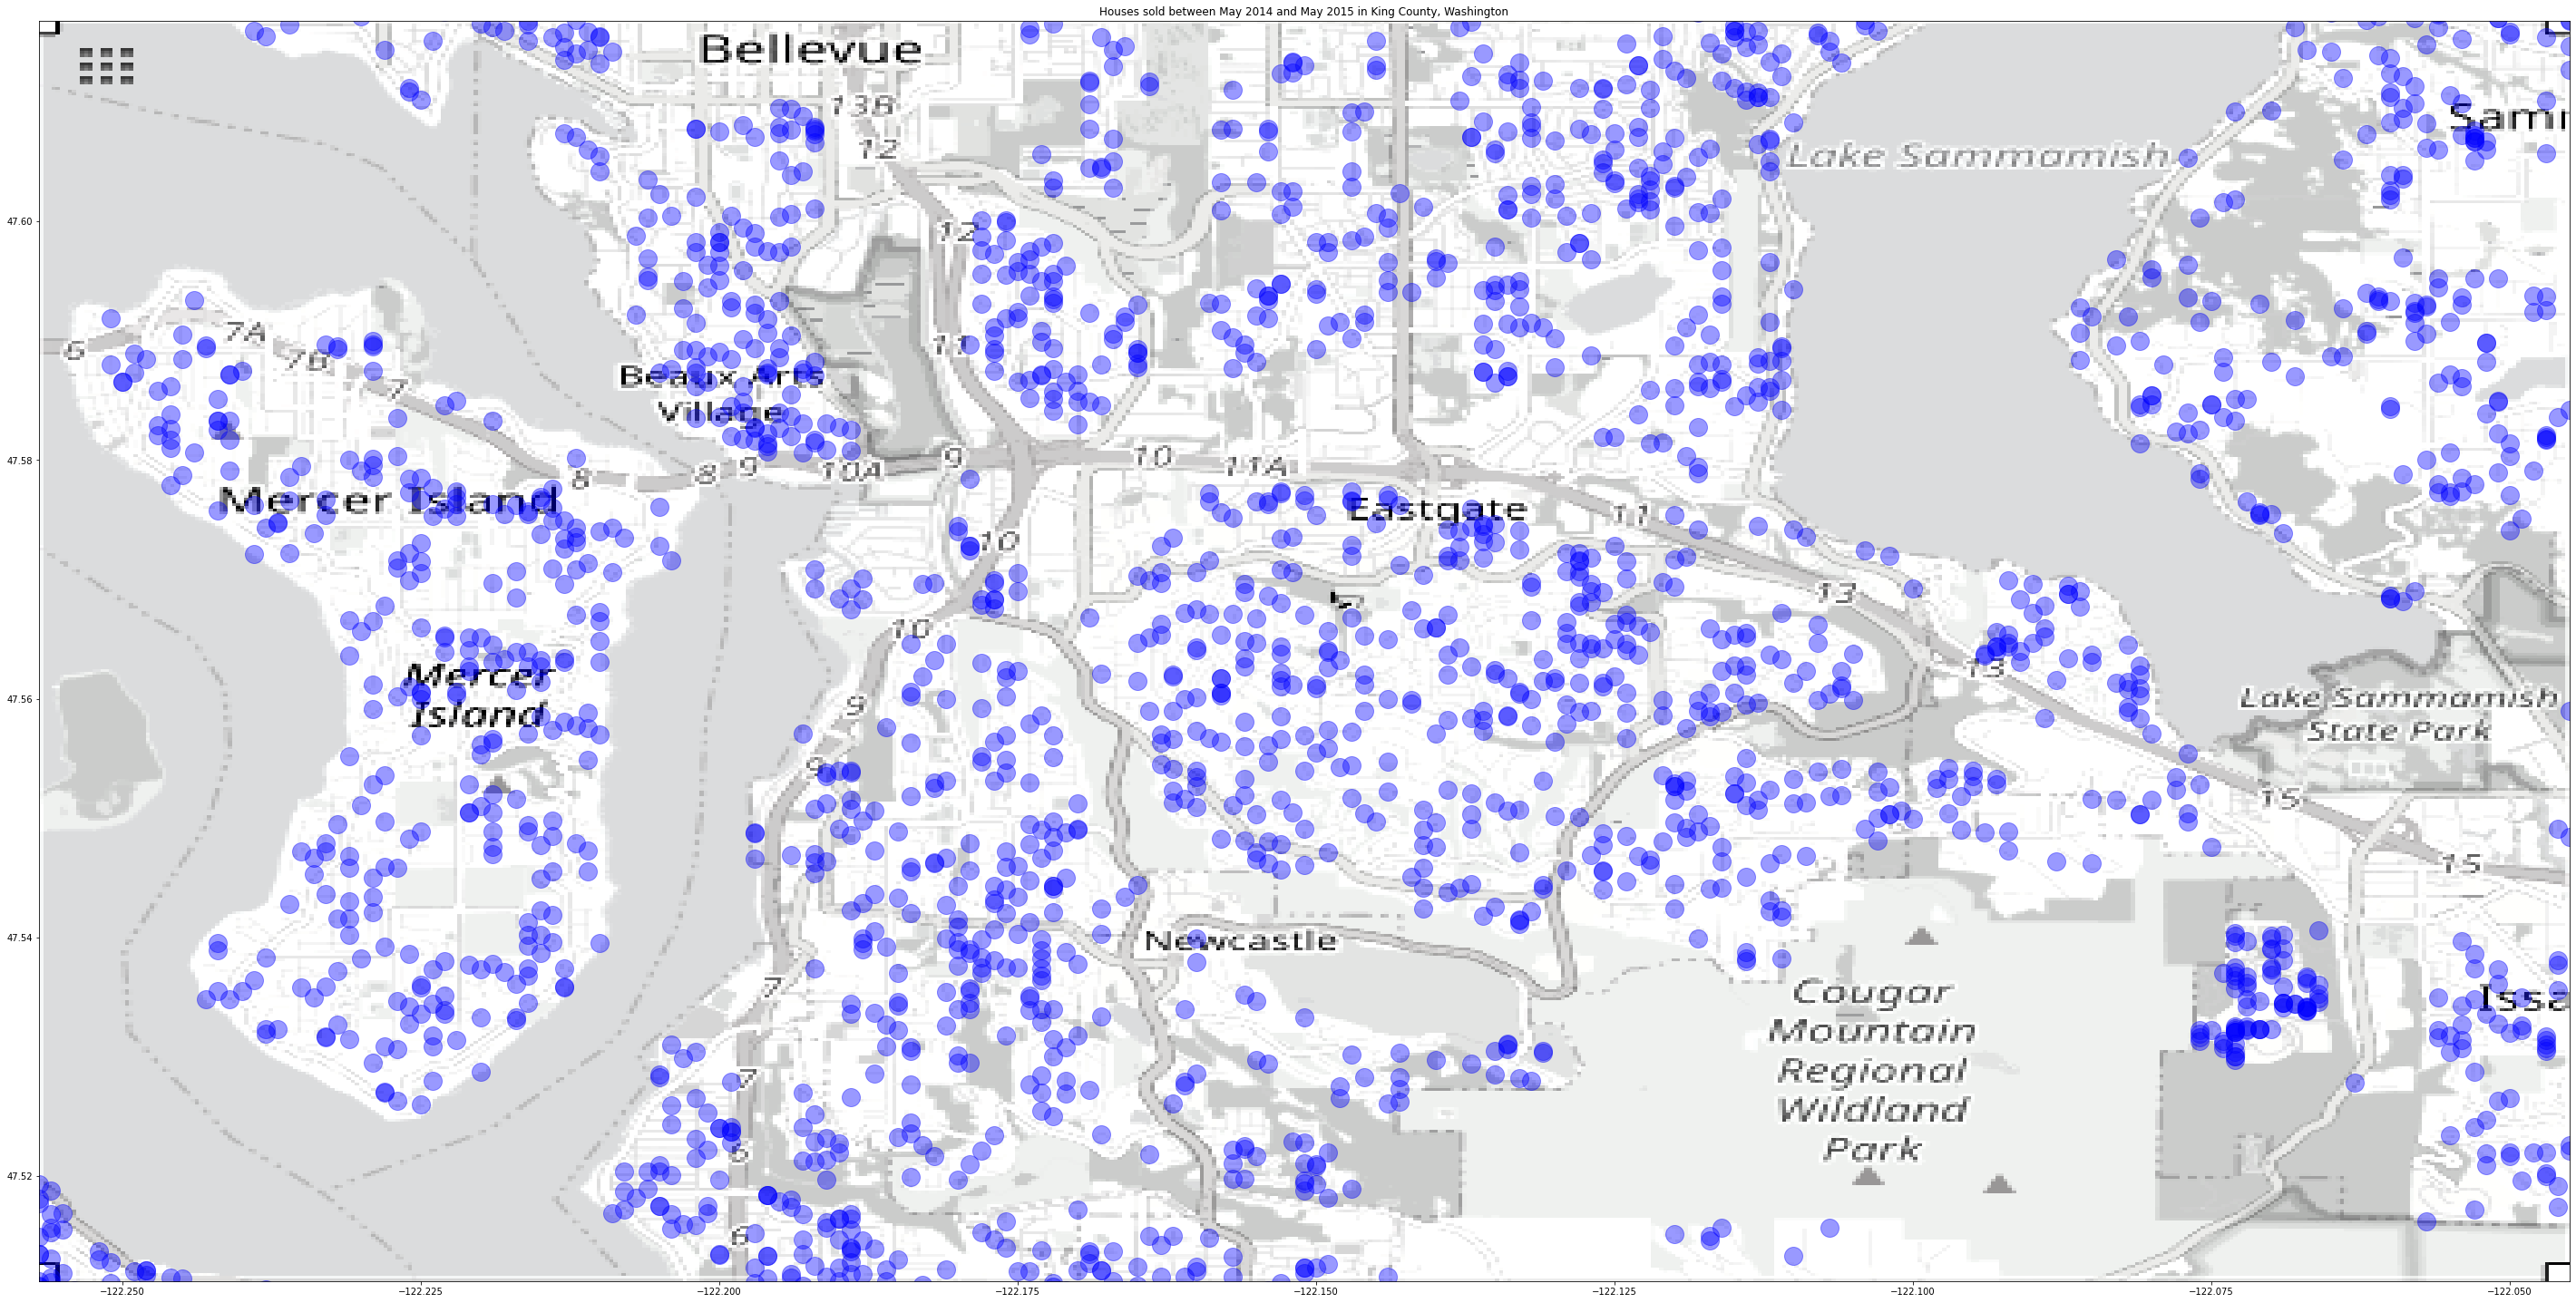

In [ ]:


fig, ax = plt.subplots(figsize = (50,30))
ax.scatter(hs['long'], hs['lat'], zorder=1, alpha= 0.4, c='b', s=400)
ax.set_title('Houses sold between May 2014 and May 2015 in King County, Washington')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')


In [ ]:
# initial statistical analysis of data for columns bedrooms and bathrooms
hs[['bedrooms', 'bathrooms']].describe()

,bedrooms,bathrooms
count,20479.000000,20545.000000
mean,3.372821,2.113507
std,0.930711,0.768913
min,0.000000,0.000000
25%,3.000000,1.500000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


In [ ]:
# NaN or Zero values for Bathrooms
hs[['bedrooms', 'bathrooms']]   [(hs['bathrooms'].isnull() | (hs['bathrooms'] == 0))]

,bedrooms,bathrooms
24,3.0,NaN
26,3.0,NaN
105,3.0,NaN
139,3.0,NaN
167,4.0,NaN
...,...,...
21441,4.0,NaN
21480,2.0,NaN
21490,3.0,NaN
21566,4.0,NaN


In [ ]:
# NaN or Zero values for Bedrooms
hs[['bedrooms', 'bathrooms']]  [(hs['bedrooms'].isnull() | (hs['bedrooms'] == 0))]

In [ ]:
# pivot table of the data for bedrooms and bathrooms (BEFORE data updates)
#hs.pivot_table(index=["bedrooms"], columns=["bathrooms"], margins=True, aggfunc="count")
#pv.groupby('bedrooms')[['bathrooms']].count()

hs.groupby('bathrooms')[['bedrooms']].count()

,bedrooms
bathrooms,
0.00,7
0.50,4
0.75,68
1.00,4739
1.25,8
1.50,1383
1.75,2901
2.00,1828
2.25,1951


In [ ]:
# show row number data, to verify it was updated
display(hs.iloc[3119])
display(hs.iloc[19452])

id                    3918400017
date             20150205T000000
price                   380000.0
bedrooms                     1.0
bathrooms                    1.0
sqft_living               1470.0
sqft_lot                   979.0
floors                       3.0
waterfront                     0
view                           2
condition                      3
grade                          8
sqft_above                  1470
sqft_basement                  0
yr_built                    2006
yr_renovated                   0
zipcode                    98133
lat                      47.7145
long                    -122.356
sqft_living15               1470
sqft_lot15                  1399
Name: 3119, dtype: object

id                    3980300371
date             20140926T000000
price                   142000.0
bedrooms                     1.0
bathrooms                    1.0
sqft_living                290.0
sqft_lot                 20875.0
floors                       1.0
waterfront                     0
view                           0
condition                      1
grade                          1
sqft_above                   290
sqft_basement                  0
yr_built                    1963
yr_renovated                   0
zipcode                    98024
lat                      47.5308
long                    -121.888
sqft_living15               1620
sqft_lot15                 22850
Name: 19452, dtype: object

In [ ]:
# comparison statistical analysis, after data updates for columns bedrooms and bathrooms
hs[['bedrooms', 'bathrooms']].describe()

,bedrooms,bathrooms
count,21613.000000,21613.000000
mean,3.246935,2.058321
std,1.029437,0.787553
min,0.000000,0.000000
25%,3.000000,1.500000
50%,3.000000,2.000000
75%,4.000000,2.500000
max,10.000000,8.000000


<AxesSubplot:xlabel='price', ylabel='bathrooms'>

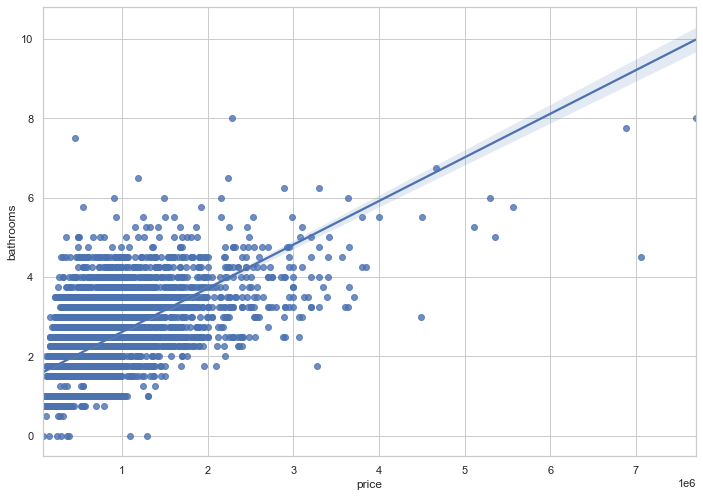

In [ ]:
sns.regplot(x="price", y="bathrooms", data=hs)

In [ ]:
# statistical significance
import researchpy

researchpy.ttest(hs['condition'], hs['yr_built'],equal_variances= False, paired= True)

,Wilcoxon signed-rank test,results
0,Mean for condition =,3.409430
1,Mean for yr_built =,1971.005136
2,T value =,0.000000
3,Z value =,-127.319000
4,Two sided p value =,0.000000
5,r =,-0.612400


In [ ]:
corr = hs.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateMonth
id,1.00,-0.02,0.00,0.00,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14,-0.01
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,-0.01
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.00,0.08,0.03,0.36,0.48,0.30,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03,0.00
bathrooms,0.00,0.53,0.52,1.00,0.75,0.09,0.50,0.07,0.19,-0.13,0.67,0.69,0.28,0.51,0.05,-0.21,0.03,0.22,0.57,0.09,0.01
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.36,0.11,0.28,-0.06,0.76,0.88,0.43,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,0.01
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.15,0.73,0.00
floors,0.02,0.26,0.18,0.50,0.36,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,0.01
waterfront,-0.00,0.27,-0.00,0.07,0.11,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.01
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,-0.01
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,0.02


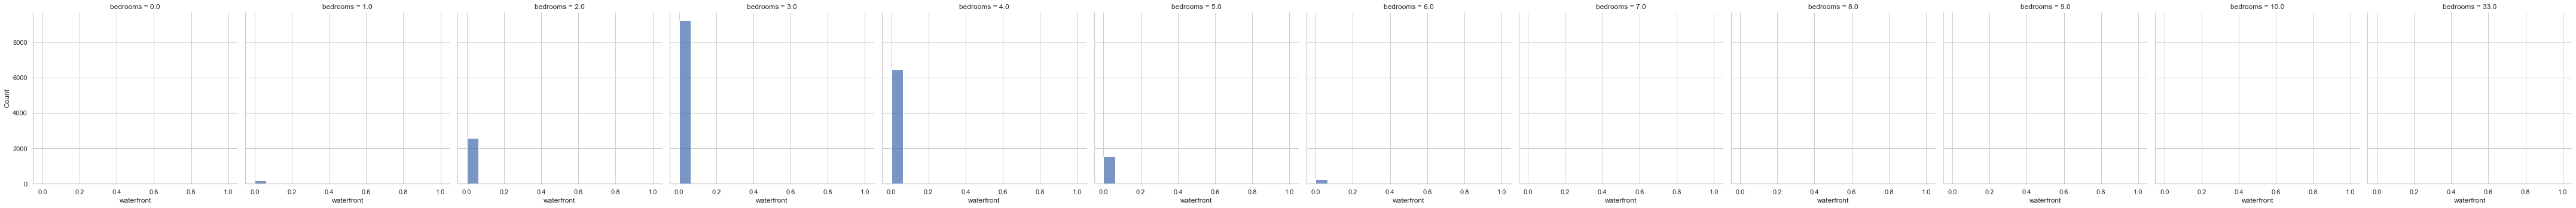

In [ ]:
sns.displot(hs, x="waterfront", col="bedrooms", multiple="dodge")